In [1]:
import matlab.engine
import matplotlib.pyplot as plt
import numpy as np
import json


In [7]:
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.3_modezero_coding.json', 'r') as f:
    result_dict = json.load(f)
with open('results/fedavg/n50_s0.1_r1000_e5_loss0.25_modezero.json', 'r') as f:
    result_dict1 = json.load(f)

print(result_dict)

{'test_acc': [0.2549800796812749, 0.4316733067729084, 0.44800796812749005, 0.4613545816733068, 0.46215139442231074, 0.44621513944223107, 0.44800796812749005, 0.4163346613545817, 0.4105577689243028, 0.398804780876494, 0.39402390438247015, 0.3840637450199203, 0.3960159362549801, 0.3695219123505976, 0.30139442231075697, 0.28227091633466134, 0.2842629482071713, 0.27629482071713146, 0.26374501992031874, 0.2559760956175299, 0.2563745019920319, 0.2047808764940239, 0.1892430278884462, 0.19243027888446215, 0.18764940239043826, 0.19203187250996015, 0.1750996015936255, 0.18645418326693228, 0.18266932270916333, 0.17310756972111555, 0.16812749003984065, 0.15996015936254981, 0.14382470119521912, 0.1362549800796813, 0.13864541832669322, 0.14063745019920318, 0.13824701195219125, 0.14721115537848606, 0.14382470119521912, 0.1402390438247012, 0.1454183266932271, 0.13545816733067728], 'test_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [31]:
len(result_dict1["test_acc"])

60

In [32]:
max_value = max(result_dict['test_acc'])
max_index = result_dict['test_acc'].index(max_value)

print(f'Max value: {max_value}')
print(f'Index of max value: {max_index}')

Max value: 0.6878486055776892
Index of max value: 20


In [4]:
for i in [0.05, 0.1, 0.15, 0.2, 0.25]:
    with open(f'results/fedbn/n50_s0.1_r300_e5_loss{i}_modezero_coding.json', 'r') as f:
        result_dict1 = json.load(f)
    print(f"Loss: {i}")
    print(f"Average: {np.mean(result_dict1['test_acc'][5:])*100}")
    print(f"Std: {np.std(result_dict1['test_acc'][5:])*100}\n\t")

Loss: 0.05
Average: 70.41760231800072
Std: 2.7038744090118922
	
Loss: 0.1
Average: 71.77399492937343
Std: 2.326872509818515
	
Loss: 0.15
Average: 71.21513944223108
Std: 2.3576772311575276
	
Loss: 0.2
Average: 71.46975733429916
Std: 2.0746110277022596
	
Loss: 0.25
Average: 71.25063382832309
Std: 2.0874561722628395
	


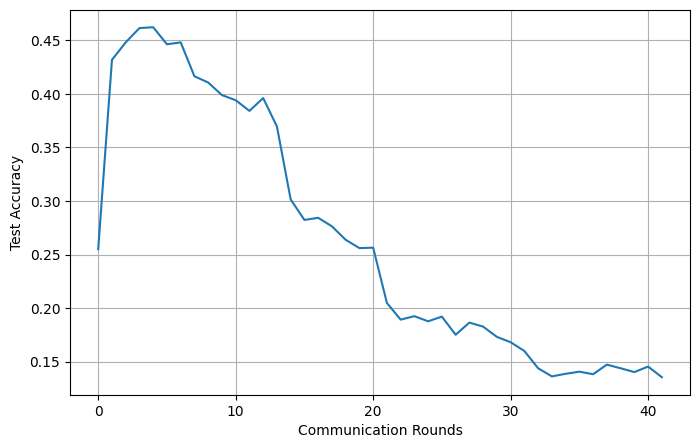

In [18]:
# Plot the accuracy
plt.figure(figsize=(8, 5))
plt.plot(result_dict['test_acc'])
plt.xlabel('Communication Rounds')
plt.ylabel('Test Accuracy')
plt.grid()
plt.show()
# plt.plot(result_dict1['test_acc'][:40])

In [2]:
with open('results/fedavg/n50_s0.1_r300_e5_loss0.25_modezero_coding_eval.json', 'r') as f:
    fedavg_coding = json.load(f)
with open('results/fedavg/n50_s0.1_r300_e5_loss0.25_modezero_eval.json', 'r') as f:
    fedavg = json.load(f)
with open('results/fedper/n50_s0.1_r300_e5_loss0.25_modezero_coding_eval.json', 'r') as f:
    fedper_coding = json.load(f)
with open('results/fedper/n50_s0.1_r300_e5_loss0.25_modezero_eval.json', 'r') as f:
    fedper = json.load(f)
with open('results/fedprox/n50_s0.1_r300_e5_loss0.25_modezero_coding_eval.json', 'r') as f:
    fedprox_coding = json.load(f)
with open('results/fedprox/n50_s0.1_r300_e5_loss0.25_modezero_eval.json', 'r') as f:
    fedprox = json.load(f)
with open('results/fedbn/n50_s0.1_r300_e5_loss0.25_modezero_coding_eval.json', 'r') as f:
    fedbn_coding = json.load(f)
with open('results/fedbn/n50_s0.1_r300_e5_loss0.25_modezero_eval.json', 'r') as f:
    fedbn = json.load(f)

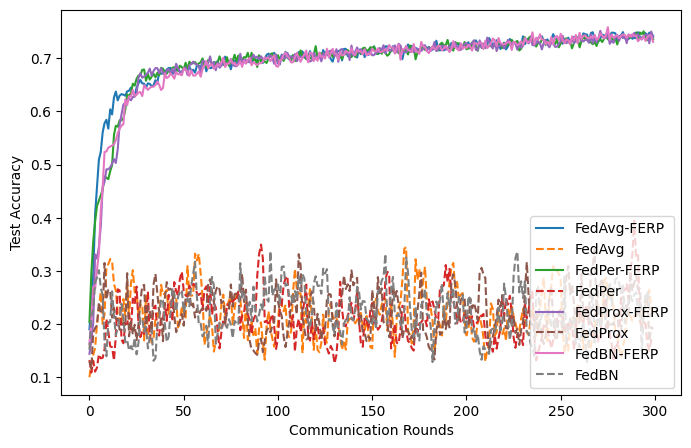

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(fedavg_coding['test_acc'], label='FedAvg-FERP')
plt.plot(fedavg['test_acc'], label='FedAvg', linestyle='--')
plt.plot(fedper_coding['test_acc'], label='FedPer-FERP')
plt.plot(fedper['test_acc'], label='FedPer', linestyle='--')
plt.plot(fedprox_coding['test_acc'], label='FedProx-FERP')
plt.plot(fedprox['test_acc'], label='FedProx', linestyle='--')
plt.plot(fedbn_coding['test_acc'], label='FedBN-FERP')
plt.plot(fedbn['test_acc'], label='FedBN', linestyle='--')
plt.xlabel('Communication Rounds')
plt.ylabel('Test Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
eng = matlab.engine.start_matlab()

In [56]:
l2e1b10 = np.load('figure_data/l5e1b10.npz')
l2e1b1024 = np.load('figure_data/l5e1b1024.npz')

In [57]:
coding_mse = np.mean(l2e1b10['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b10['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data1_matlab = matlab.double(coding_mse.tolist())
average_data2_matlab = matlab.double(base_mse.tolist())
x_axis = matlab.double(list(range(1, len(coding_mse) + 1)))

coding_mse = np.mean(l2e1b1024['coding_val_mse'], axis=0)
base_mse = np.mean(l2e1b1024['base_val_mse'],axis=0)

# Plot the figure in matlab
average_data3_matlab = matlab.double(coding_mse.tolist())
average_data4_matlab = matlab.double(base_mse.tolist())

# Plot the data in MATLAB
eng.figure(1.0,nargout=0)
eng.plot(x_axis, average_data1_matlab, 'r-', nargout=0)

eng.hold('on', nargout=0)
eng.plot(x_axis, average_data3_matlab, 'b-', nargout=0)
eng.plot(x_axis, average_data2_matlab, 'g-', nargout=0)
eng.plot(x_axis, average_data4_matlab, 'm-', nargout=0)




eng.hold('off', nargout=0)

font_size = 14
eng.legend(['FedAvg-FERP, B=10', 'FedAvg-FERP, B=1024', 'FedAvg, B=10', 'FedAvg, B=1024'], 'FontSize', 10, nargout=0)
eng.xlabel('Communication Rounds', 'FontSize', font_size)
eng.ylabel('MSE', 'FontSize', font_size)
# eng.title('loss=5%, E=5, B=1024')
eng.grid('on', nargout=0)

# Use drawnow to ensure the figure appears
eng.drawnow(nargout=0)

## Average val mse after 150 round

In [49]:
tmp_data = np.load('figure_data/l2e1b10.npz')
average_coding_mse = np.nanmean(tmp_data['coding_mse'][:,150:1000])
average_coding_val_mse = np.nanmean(tmp_data['coding_val_mse'][:,150:1000])
average_base_mse = np.nanmean(tmp_data['base_mse'][:,150:1000])
average_base_val_mse = np.nanmean(tmp_data['base_val_mse'][:,150:1000])

print(f'coding_mse: {average_coding_mse}')
print(f'coding_val_mse: {average_coding_val_mse}')
print(f'base_mse: {average_base_mse}')
print(f'base_val_mse: {average_base_val_mse}')

coding_mse: 323.1957190614588
coding_val_mse: 447.0334008115881
base_mse: 959.6834428764791
base_val_mse: 944.0132116205552
